# CROSS VALIDATION

Cross-validation is a model evaluation technique used to test how well a model generalizes to unseen data. Instead of splitting the dataset into just one training and one testing set, cross-validation repeatedly splits the data into training and testing subsets in different ways.

1. The most common type is k-fold cross-validation:

2. The data is divided into k equal-sized folds (subsets).

3. The model is trained on k-1 folds and tested on the remaining 1 fold.

4. This process repeats k times, each time with a different fold as the test set.

5. The average performance across all folds is reported.

6. This reduces bias (compared to one single split) and gives a better estimate of model performance.

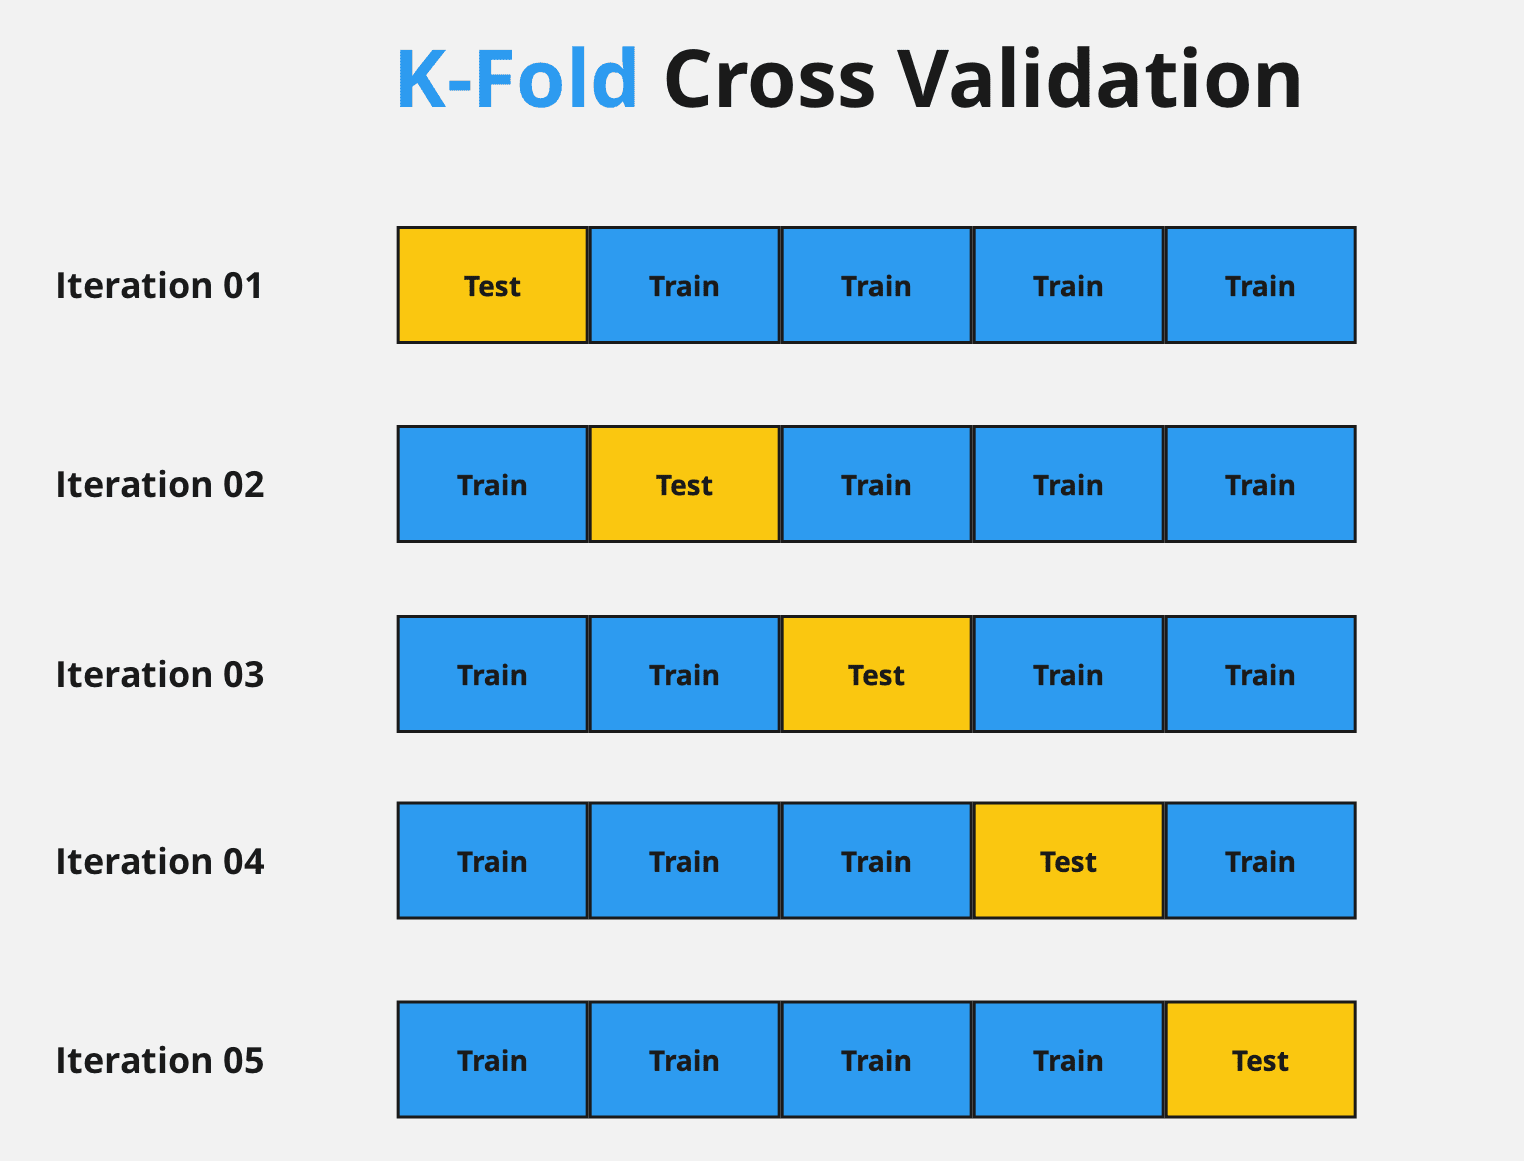

In [1]:
install.packages("caret")
library(caret)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



In [2]:
data(mtcars)

# 1. Define cross-validation method (5-fold CV here)
train_control <- trainControl(method = "cv", number = 5)

# 2. Train linear regression model using lm
set.seed(123)
lm_model <- train(
  mpg ~ wt + hp,      # formula
  data = mtcars,      # dataset
  method = "lm",      # base R linear regression
  trControl = train_control,
  metric = "RMSE"     # evaluation metric
)

# 3. Print model results
print(lm_model)


Linear Regression 

32 samples
 2 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 26, 25, 25, 26, 26 
Resampling results:

  RMSE      Rsquared   MAE     
  2.700695  0.8484373  2.144004

Tuning parameter 'intercept' was held constant at a value of TRUE


In [3]:
# Use the fitted model to predict on the training dataset
predictions <- predict(lm_model, newdata = mtcars)

# Show first 10 predictions
head(predictions, 10)

# Compare predictions with actual values
results <- data.frame(
  Actual = mtcars$mpg,
  Predicted = predictions
)

head(results, 10)

# 1. Compute RMSE and R² using caret's postResample
postResample(pred = results$Predicted, obs = results$Actual)

Mazda RX4     Mazda RX4 Wag        Datsun 710    Hornet 4 Drive 
         23.57233          22.58348          25.27582          21.26502 
Hornet Sportabout           Valiant        Duster 360         Merc 240D 
         18.32727          20.47382          15.59904          22.88707 
         Merc 230          Merc 280 
         21.99367          19.97946

,Actual,Predicted
,<dbl>,<dbl>
Mazda RX4,21.0,23.57233
Mazda RX4 Wag,21.0,22.58348
Datsun 710,22.8,25.27582
Hornet 4 Drive,21.4,21.26502
Hornet Sportabout,18.7,18.32727
Valiant,18.1,20.47382
Duster 360,14.3,15.59904
Merc 240D,24.4,22.88707
Merc 230,22.8,21.99367


RMSE  Rsquared       MAE 
2.4688545 0.8267855 1.9014838

## Summary

| **Function**     | **Purpose**                                                   | **Type of CV / Resampling**                        | **Key Arguments / Usage**                                                                  | **Notes**                                                |
| ---------------- | ------------------------------------------------------------- | -------------------------------------------------- | ------------------------------------------------------------------------------------------ | -------------------------------------------------------- |
| `trainControl()` | Define resampling method for model training                   | k-fold CV, repeated CV, LOOCV, bootstrap           | `method = "cv"` (k-fold), `"repeatedcv"`, `"LOOCV"`, `"boot"`; `number = k`, `repeats = n` | Works with `train()` to perform CV on models             |
| `train()`        | Fit a model using CV as defined in `trainControl()`           | Uses the resampling method defined in `trControl`  | `trControl = trainControl(...)`; `metric = "RMSE"` / `"Accuracy"`; formula + data + method | Automatically computes performance metrics for each fold |
| `resamples()`    | Collect and summarize resampling results from multiple models | Any resampling done via `train()`                  | `resamples(list(model1 = model1, model2 = model2))`                                        | Useful for comparing multiple models’ CV performance     |
| `getTrainPerf()` | Extract training performance metrics from `train()`           | Any resampling                                     | `getTrainPerf(model)`                                                                      | Gives averaged metrics across resamples                  |
| `postResample()` | Evaluate model performance on test/prediction data            | Not CV itself, but compute metrics (RMSE, R², MAE) | `postResample(pred = predicted_values, obs = actual_values)`                               | Useful for evaluating CV predictions manually            |
